## Question 1:  What is a Decision Tree, and how does it work in the context of classification?

Answer :

A Decision Tree is a flowchart-like model that splits data into groups based on features, leading to clear, step-by-step predictions. For classification, it keeps splitting data using rules that group similar classes together, making it very interpretable and practical for classifying data into categories.

- Results are easy to explain: Every prediction is a path through the tree, showing exactly why a certain decision is made.
- No need for feature scaling or much preprocessing.
-  work well for both small and large datasets.

**What is a Decision Tree?**

1. The root node is the top decision point, representing a feature that best splits the data.
2. Internal (decision) nodes split the dataset based on certain rules about input features.
3. Branches show possible outcomes of tests on features (like yes/no questions).
4. Leaf nodes are the endpoints, representing final predictions—like class labels for classification tasks.

**how does it work in the context of classification?**

1. The root node is the top decision point, representing a feature that best splits the data.

The root feature is chosen by calculating which feature best separates the data into pure groups using metrics like information gain or Gini index. The feature providing the highest gain or lowest impurity becomes the root, starting the tree with the most useful split. This maximizes decision accuracy from the top level down.

2. Data is split into groups, and each internal node continues splitting based on the most useful feature at that point.

3. This process repeats, with the goal of separating the data into the purest possible groups (each group ideally belonging to a single class).  [using entropy or gini index}



## Question 2: Explain the concepts of Gini Impurity and Entropy as impurity measures. How do they impact the splits in a Decision Tree?

Answer :

Entropy and gini impurity are inversaly proportional to each other.

**Gini Impurity:**

Formula = 1 - summation { p_i^2}

p_i is the probability of class i in the node.

Gini Impurity ranges from 0 (perfect purity) to nearly 1 (maximum impurity), showing how well the decision tree has split the data into clear groups.

two-class problem, the maximum Gini value is 0.5 { both classes are equally present, 50% each }

- It measures the impurity of a node in a decision tree.
- A split in the tree is said to be pure if all the data points at a node belong accurately to a single class.
- It is measures the chance that a randomly picked data point from a node would be misclassified if its class label was randomly assigned based on the class distribution in that node.

Example :  

Suppose a node with 5 data points:

- 2 belonging to class A.
- 3 belonging to class B

Probality_of_class_A=2/5=0.4
Probality_of_class_B=3/5=0.6

gini_impurity = 1 - {[Probality_of_class_A]^2 + [Probality_of_class_B]^2} = 1-{[0.4]^2 + [0.6]^2 } = 1-[0.16+0.36]=1-0.52=0.48

This means theres a 48% chance that if you randomly assigned the class label to a data point based on this distribution, you would misclassify it.

It shows the chance of misclassifying a random data point in the node based on the current mix of classes.

- If all data points in a node belong to the same class, the Gini Impurity is 0, meaning perfect purity and no chance of misclassification.

- If classes are perfectly mixed equally, the Gini Impurity is higher (towards 0.5 for two classes or more for multiple classes), indicating more disorder and higher misclassification chance.[more impurity]

**Entropy:**

Entropy = - summation {p_i log (p_i)}

- Entropy measures the disorder or randomness in a node by quantifying how mixed the classes are.
- Entropy tells us how uncertain or mixed the classes are in a node. If it's mixed equally among classes, entropy is high (more disorder). If mostly one class is present, entropy is low (less disorder)
- If all data points are of the same class, there is no disorder or uncertainty, so entropy is 0 (node is pure/more homogeneous).
- If classes are evenly mixed (e.g., 50% of Class A and 50% of Class B), uncertainty is highest, so entropy is maximum.
- More comprehensive but computationally intensive because of the logarithmic calculation.

For example :         

a bank wants to decide whether to approve a loan application. They have data on 10 applicants:

- 7 were approved (Class: Yes)

- 3 were denied (Class: No)

This is our starting node. The bank wants to classify new applications based on features like income.

**Entropy measures how mixed these approved and denied cases are in the group.**

- If everyone was approved (all yes),entropy = 0 (pure, no uncertainty)
- If half were approved and half denied(5 yes and 5 no), entropy = 1 (maximum disorder)

Since 7 out of 10 were approved, entropy will be between 0 and 1, showing some uncertainty.

using entropy : bank tries a split: does income > 50,000 predict approval?

group A (income >= 50000) : 5 approved, 1 denied — entropy lowers here (more pure group)

group B (income <= 50000) :  2 approved, 2 denied — more mixed, higher entropy

Entropy helps the decision tree separate the approved and denied groups clearly by finding the split that reduces the mix of classes, improving the decision quality.




## Question 3: What is the difference between Pre-Pruning and Post-Pruning in Decision Trees? Give one practical advantage of using each.

Answer :

**Pre_Pruning(Early stopping):**

1. Stops building the tree early before it perfectly fits the training data.
2. Sets limits like max tree depth, minimum samples required to split a node, or minimum samples in a leaf.

- Practical advantage:

      - Prevents overfitting early by stopping tree growth before it becomes too complex.
      - Saves training time and computational resources since the tree is smaller.
      - Produces simpler, more interpretable models.
      - Useful for large datasets with many features.

Disadvanatge :    

          - Risk of underfitting if stopped too early, missing some important patterns.
          - May rely on heuristic thresholds, which can be hard to tune.

- Example : In a loan approval system, instead of creating a huge tree for every tiny pattern, the model stops growing once splits become insignificant, saving time and avoiding overfitting to rare cases.

**Post-Pruning(Prune After Full Tree):**

1. Builds the full tree, then removes branches that don't improve accuracy (usually validated on test data).
2. Techniques like cost-complexity pruning remove unnecessary splits after tree construction.
- Practical advantage:

          - Often creates more accurate trees, especially on small datasets, by correcting overly complex models.
          - Builds a full tree capturing all patterns, then removes noisy or unhelpful branches.
          - Usually results in better overall accuracy and generalization on unseen data.
          - More flexible as pruning decisions consider the whole tree structure.

Disadvantage :            

          - Computationally intensive since the full tree must first be grown.
          - The final tree might be more complex than a pre-pruned tree, affecting interpretability.
          
- Example : In medical diagnosis, it builds a detailed tree capturing all patterns, then removes branches that do not generalize well, simplifying decisions without losing accuracy.


## Question 4: What is Information Gain in Decision Trees, and why is it important for choosing the best split?

Answer :  

Information Gain tells us how much better we can separate the classes (or target groups) in the data by splitting it using a certain feature. It measures the decrease in uncertainty or disorder after the split.

When building a decision tree, we look at every feature (like age, income, etc.) and check how well splitting the data based on that feature reduces confusion (uncertainty) about the target variable (like loan approval).

The feature that reduces this confusion the most (i.e., gives the biggest improvement in separating the target classes) is the one selected for the split at that node. This is because it provides the highest Information Gain.

**why is it important for choosing the best split?**

1. The decision tree uses Information Gain to decide the best feature to split on at each node.

2. Choosing the feature with the highest IG leads to the purest child nodes, improving model accuracy.

3. It ensures the tree learns the most meaningful patterns first, optimizing model performance and interpretability.

4. The decision tree picks the feature that best helps it to separate or organize the data into clear groups, making it easier to predict the target variable correctly.

Example : Imagine predicting loan approval. Splitting on Income > 50K reduces uncertainty more than splitting on Number of siblings, so the tree picks the Income feature to split first because it provides a better separation of approved vs. denied applicants.

## Question 5: What are some common real-world applications of Decision Trees, and what are their main advantages and limitations?

Answer:

**Real_World_Application:**

1. Loan approval in finance, deciding which applicants get loans.

2. Disease diagnosis in healthcare, identifying if a patient has a certain condition.

3. Customer segmentation for marketing to target the right audience.

4. Quality control in manufacturing to detect defective products.

5. Student performance prediction in education.

**Advantage:**

1. Easy to Understand: Decision trees look like flowcharts, so their decisions are easy to follow and explain.

2. Handles Various Data Types: Works well with both numerical and categorical data without much preprocessing.

3. No Need for Feature Scaling: Unlike many algorithms, decision trees do not require normalization or scaling of data.

4. Captures Non-linear Relationships: Can model complex patterns that linear models cannot.

5. Automatic Feature Selection: Highlights the most important features for prediction.

6. Robust to Outliers: Less affected by extreme values because splits depend on majority data points.

7. Fast Training and Prediction: Efficient with medium-sized datasets.

8. Interpretable: Useful when you need clear explanations for decisions, important in finance, healthcare, etc.

**Limitations:**

1. Prone to Overfitting: Especially when trees grow deep without pruning, capturing noise rather than true patterns.

2. Unstable: Small data changes can produce very different trees, reducing reliability.

3. Bias Toward Features with Many Levels: Prefer features with many distinct values, which may mislead splitting decisions.

4. Lower Accuracy Alone: Generally less accurate compared to ensemble methods (Random Forest, Gradient Boosting).

5. Computational Complexity: Can be expensive to train on very large datasets or with many features.



## Dataset Info:

**Iris Dataset for classification tasks (sklearn.datasets.load_iris() or provided CSV).**


**Boston Housing Dataset for regression tasks (sklearn.datasets.load_boston() or provided CSV).**

## Question 6:   Write a Python program to:

*  Load the Iris Dataset
* Train a Decision Tree Classifier using the Gini criterion
* Print the models accuracy and feature importances

Answer :

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns

In [86]:
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [87]:
data=sns.load_dataset('iris')

In [88]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [89]:
data["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [90]:
X=data.iloc[:,:-1]

In [91]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [92]:
y=data.species

In [93]:
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [94]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [95]:
# Apply LabelEncoder to the target variable y
y = label_encoder.fit_transform(y)

In [96]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [98]:
# create decision tree with gini criterion

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini',random_state=42)

In [99]:
# train the classifier
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [100]:
y_pred=model.predict(X_test)

In [101]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [102]:
# models accuracy and feature importances

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [103]:
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00


In [104]:
# Print feature importances
for feature_name, importance in zip(data.columns, model.feature_importances_):
    print(f"{feature_name}: {importance:.3f}")

sepal_length: 0.000
sepal_width: 0.017
petal_length: 0.906
petal_width: 0.077


In [105]:
# petal_length = 0.906 is most imp feature for classification, then petal_width = 0.077 , sepal width had very minor contribution and
# sepal_length didnot contribute to the decision-making process in this specific model.

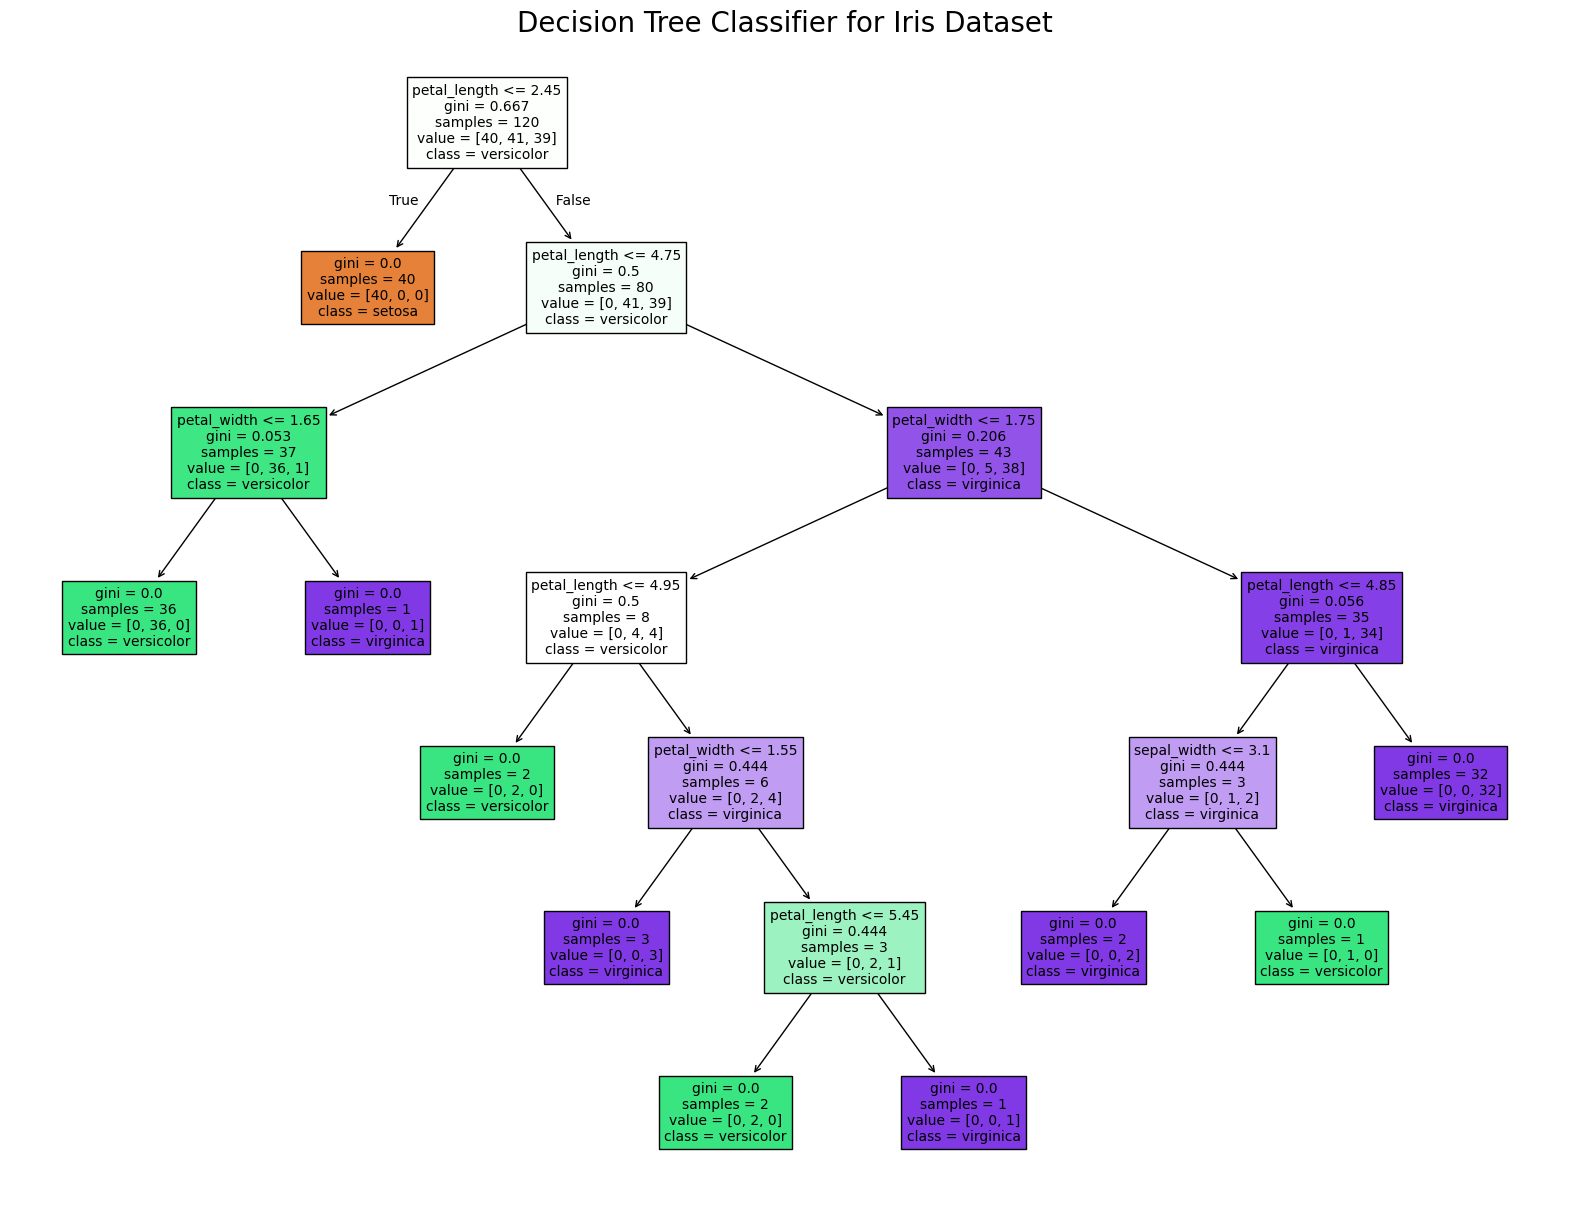

In [106]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,15))
_ = tree.plot_tree(model,
                   feature_names=X.columns.tolist(),
                   class_names=label_encoder.classes_.tolist(),
                   filled=True,
                   fontsize=10)
plt.title('Decision Tree Classifier for Iris Dataset', fontsize=20)
plt.show()

In [107]:
# A Gini value of 0 indicates a pure node, meaning all samples in that node belong to the same class. Higher Gini values indicate more impurity
 # (a mix of classes).

## Question 7:  Write a Python program to:

* Load the Iris Dataset
* Train a Decision Tree Classifier with max_depth=3 and compare its accuracy to a fully-grown tree

Answer :

In [108]:
from sklearn.datasets import load_iris

In [109]:
iris_data=load_iris()

In [110]:
independent_features=pd.DataFrame(iris_data.data,columns=iris_data.feature_names)

In [111]:
independent_features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [112]:
target_feature=iris_data.target

In [113]:
target_feature

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [114]:
X=independent_features
y=target_feature

In [115]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [116]:
X_train.shape

(112, 4)

In [117]:
X_test.shape

(38, 4)

In [118]:
# Train Decision Tree with max_depth=3
from sklearn.tree import DecisionTreeClassifier
model_2=DecisionTreeClassifier(max_depth=3,random_state=42)

In [119]:
model_2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [120]:
y_pred_1=model_2.predict(X_test)

In [121]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [122]:
Accuracy_score_model_1=accuracy_score(y_test,y_pred_1)
print(f"Model Accuracy: {Accuracy_score_model_1:.2f}")

Model Accuracy: 1.00


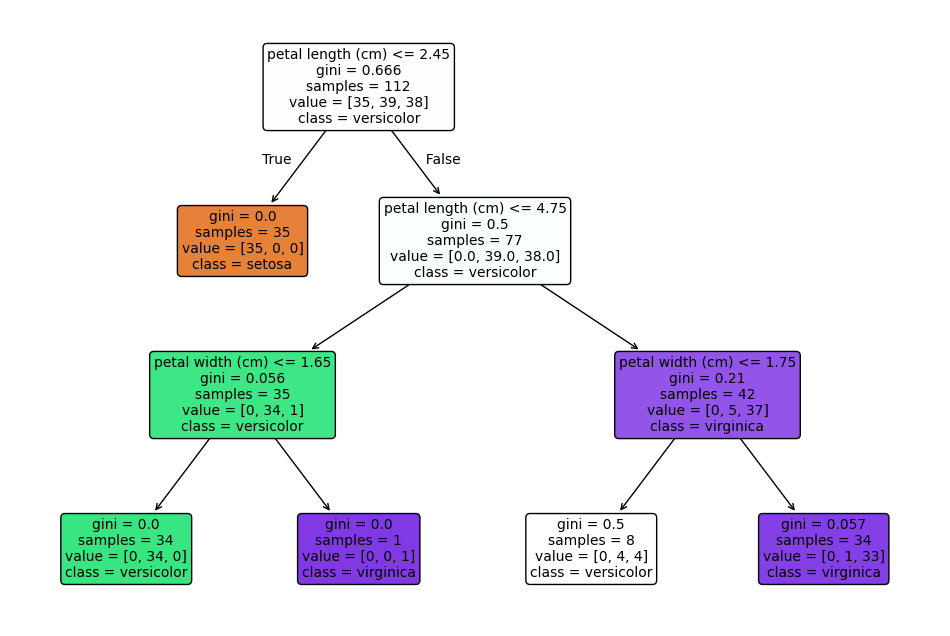

In [123]:
# visualization

from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(model_2, feature_names=iris_data.feature_names, class_names=iris_data.target_names,
          filled=True, rounded=True, fontsize=10)
plt.show()

In [124]:
# Train fully-grown Decision Tree (no max_depth)

model_3=DecisionTreeClassifier(random_state=42)

In [125]:
model_3.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [126]:
y_pred_model_3=model_3.predict(X_test)

In [127]:
y_pred_model_3

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [128]:
accuracy_score_model_3 =accuracy_score(y_test,y_pred_model_3)
print(f"acuracy with model_3: {accuracy_score_model_3:.2f}")

acuracy with model_3: 1.00


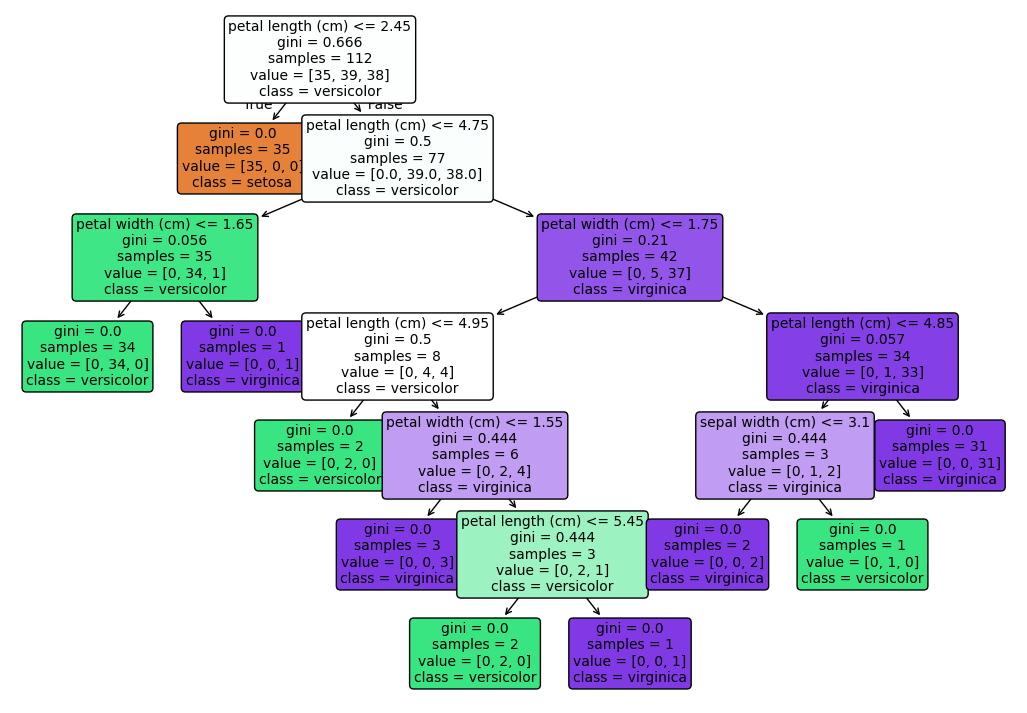

In [129]:
from sklearn.tree import plot_tree
plt.figure(figsize=(13,9))
plot_tree(model_3, feature_names=iris_data.feature_names, class_names=iris_data.target_names,
          filled=True, rounded=True, fontsize=10)
plt.show()

In [130]:
# Comparing Accuracy
print(f"Accuracy score of model_2 : {Accuracy_score_model_1:.2f}")
print(f"Accuracy score of model_3 : {accuracy_score_model_3: .2f}")

Accuracy score of model_2 : 1.00
Accuracy score of model_3 :  1.00


In [131]:
# Comaprision
# 1. The simpler tree (max_depth=3) is sufficient to capture the important patterns in the data without losing accuracy.
# 2. The fully grown tree does not improve accuracy further, indicating that growing the tree deeper does not necessarily yield better performance on this dataset.
# 3. This suggests the model is well-regularized and not overfitting despite the perfect accuracy.
# 4.  max_depth=3 tree is preferred for interpretability and generalization when accuracy is the same.

## Question 8: Write a Python program to:

* Load the Boston Housing Dataset
* Train a Decision Tree Regressor
* Print the Mean Squared Error (MSE) and feature importances

Answer :

In [132]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [133]:
data=fetch_california_housing()

In [134]:
display(data)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [135]:
house_data=pd.DataFrame(data.data,columns=data.feature_names)

In [136]:
house_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [137]:
target=data.target

In [138]:
target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [139]:
house_data.shape,target.shape

((20640, 8), (20640,))

In [140]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(house_data,target,test_size=0.28,random_state=42)

In [141]:
# train decision tree regressor
model_decision_tree_regressor=DecisionTreeRegressor(random_state=42)

In [142]:
model_decision_tree_regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [143]:
# prediction
y_pred=model_decision_tree_regressor.predict(X_test)

In [144]:
#mean squared error
mse=mean_squared_error(y_test,y_pred)

In [145]:
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.52


In [146]:
# A Mean Squared Error (MSE) of 0.52 indicates the Decision Tree Regressor is performing well on the California Housing dataset,
# with predictions closely matching actual housing prices.
# This suggests the model captures key patterns in the data, but further evaluation like cross-validation or comparison with other models is needed to ensure it generalizes well
# and is not overfitting.

In [147]:
# feature importances
for feature_name, importance in zip(data.feature_names, model_decision_tree_regressor.feature_importances_):
    print(f"{feature_name}: {importance:.3f}")

MedInc: 0.520
HouseAge: 0.052
AveRooms: 0.051
AveBedrms: 0.028
Population: 0.031
AveOccup: 0.140
Latitude: 0.088
Longitude: 0.089


In [148]:
# MedInc (Median Income) has the highest importance (0.520), meaning median income is the strongest factor influencing house prices.
# AveOccup (Average Occupants per Household) also shows notable influence (0.140).
# Features like Latitude (0.088) and Longitude (0.089) reflect geographical importance in pricing.
# Other features like HouseAge (0.052), AveRooms (0.051), Population (0.031), and AveBedrms (0.028) have smaller but non-negligible impacts.

## Question 9: Write a Python program to:

* Load the Iris Dataset
* Tune the Decision Trees max_depth and min_samples_split using GridSearchCV
* Print the best parameters and the resulting model accuracy

Answer :

In [149]:
from sklearn.model_selection import GridSearchCV

In [150]:
Iris_data_2=load_iris()

In [151]:
independtent_features=pd.DataFrame(Iris_data_2.data,columns=Iris_data_2.feature_names)

In [152]:
target=Iris_data_2.target

In [153]:
X=independtent_features
y=target

In [154]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [155]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [156]:
X.shape,y.shape

((150, 4), (150,))

In [157]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.24,random_state=42)

In [158]:
classifier = DecisionTreeClassifier(random_state=42)

In [159]:
# hyperparamter tunning grid search cv

paramter = {
    'max_depth': range(1, 9),             # Try depths from 1 to 9
    'min_samples_split':range(2,9)        # Try different values for min_samples_split
}


In [160]:
# use grid search cv with 5 kfold cross validation

grid_search = GridSearchCV(estimator=classifier, param_grid=paramter, cv=5,verbose=1)

In [161]:
# Fit GridSearch to training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(1, 9),
                         'min_samples_split': range(2, 9)},
             verbose=1)

In [162]:
# Print best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 4, 'min_samples_split': 6}


In [163]:
#  Predict on test set using best estimator and calculate accuracy

best_model=grid_search.best_estimator_

In [164]:
best_model

DecisionTreeClassifier(max_depth=4, min_samples_split=6, random_state=42)

In [165]:
y_pred=best_model.predict(X_test)

In [166]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2])

In [167]:
accuracy=accuracy_score(y_test,y_pred)

In [168]:
accuracy

1.0

## Question 10: Imagine youre working as a data scientist for a healthcare company that wants to predict whether a patient has a certain disease. You have a large dataset with mixed data types and some missing values. Explain the step-by-step process you would follow to:

* Handle the missing values
* Encode the categorical features
* Train a Decision Tree model
* Tune its hyperparameters
* Evaluate its performance And describe what business value this model could provide in the real-world setting.

Answer :

1. Handling Missing Values :     

-  Numerical data : Impute using mean/median for normally distributed variables, or advanced methods like KNN/regression imputation if missingness is related to other features.

- Categorical data :  Impute using  mode, or create a separate missing category if the absence is informative.

- Misssing not at random :  When data is MNAR (Missing Not At Random), the fact that data is missing depends on the missing values themselves (e.g., sicker patients may skip reporting). Simply imputing missing values can cause bias. So, add a binary flag feature for each variable indicating whether data was missing or not. This lets the model learn informative missingness patterns and improves prediction accuracy while reducing bias.


2. Encoding Categorical Features:{one hot,label,target guided,tree based encoding}

Encode categorical features with one-hot encoding or target guided encoding based on the feature cardinality. Avoid target leakage by ensuring the encoder is fitted only on training data and applied on test data.


3. Training a Decision Tree Model :   Fit a Decision Tree classifier on the cleaned and encoded data, which naturally handles mixed data types well.


4. Hyperparamter Tunning  :  

- Use train-test split but also validate hyperparameters using k-fold cross-validation to ensure model generalizes well to unseen data and avoids overfitting.
- Use GridSearchCV or RandomizedSearchCV to find optimal max_depth, min_samples_split, min_samples_leaf, criterion (gini/entropy),and max_features.
and balancing bias and variance.


5. Metrics and Business value :  

evaluate performance of a disease prediction model using  key metrics from the test data :          

* Accuracy: Overall correctness of predictions.

* Recall (Sensitivity): How well the model identifies actual disease cases (critical to minimize missed diagnoses).

* Precision: How many predicted cases actually have the disease.

* F1-Score: Balance between recall and precision.

* ROC-AUC: Measure of the models ability to distinguish between classes.

healthcare, prioritize recall to catch as many true disease cases as possible,but maintain reasonable precision to avoid many false alarms.

Beware of perfect accuracy — this often indicates overfitting or data leakage. Always validate on external data

**Business value this model :**
Early disease detection models can improve patient outcomes, reduce treatment costs, and help healthcare providers allocate resources efficiently, but model reliability and interpretability are essential for clinical trust